![Star Wars Logo](https://i.ytimg.com/vi/_D0ZQPqeJkk/hqdefault.jpg)

# Survey of Opinions on Star Wars

An analysis of survey results where respondents were asked questions about their feelings on the films in the Star Wars franchise.  The survey was conducted a year prior to the release of Episode 7: The Force Awakens.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

star_wars = pd.read_csv("star_wars.csv", encoding="ISO-8859-1")
star_wars.head(5)

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,NaN,Response,Response,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,Star Wars: Episode I The Phantom Menace,...,Yoda,Response,Response,Response,Response,Response,Response,Response,Response,Response
1,3.292880e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,Yes,No,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


## Curating, organizing, and cleaning the data

The dataset comes a [FiveThirtyEight](https://fivethirtyeight.com/features/americas-favorite-star-wars-movies-and-least-favorite-characters/) article.  There are some formatting issues that need to be addressed before analysis is performed.


The first row is additional header information, and some of the columns should be combined with the current header.  The first set of columns, 3 through 8, ask the user if they have seen each of the 6 Star Wars films.  The next six columns, 9 through 14, ask users to rank each of the films, from 1st to 6th.  The headers will be adjusted to reflect this.

In [2]:
# Storing the first row as a list for future use
second_header = list(star_wars.loc[0]) 

# Removing the first row from the dataset
star_wars = star_wars[pd.notnull(star_wars["RespondentID"])]

# Renaming columns 3 through 14 to clarify what the questions was asking
# Columns 3-8 ask users if they have seen each of the 6 Star Wars films
# Columns 9-14 ask users to rank each movie on a scale of 1 to 6, with 1 being the best 

for r in range(3,9):
    new_name_seen = "I have seen " + second_header[r]
    new_name_rank = "Rank of " + second_header[r]
    star_wars.rename(columns = {star_wars.columns[r]:new_name_seen}, inplace=True)
    star_wars.rename(columns = {star_wars.columns[r+6]:new_name_rank}, inplace=True)
    
star_wars.columns

Index(['RespondentID',
       'Have you seen any of the 6 films in the Star Wars franchise?',
       'Do you consider yourself to be a fan of the Star Wars film franchise?',
       'I have seen Star Wars: Episode I  The Phantom Menace',
       'I have seen Star Wars: Episode II  Attack of the Clones',
       'I have seen Star Wars: Episode III  Revenge of the Sith',
       'I have seen Star Wars: Episode IV  A New Hope',
       'I have seen Star Wars: Episode V The Empire Strikes Back',
       'I have seen Star Wars: Episode VI Return of the Jedi',
       'Rank of Star Wars: Episode I  The Phantom Menace',
       'Rank of Star Wars: Episode II  Attack of the Clones',
       'Rank of Star Wars: Episode III  Revenge of the Sith',
       'Rank of Star Wars: Episode IV  A New Hope',
       'Rank of Star Wars: Episode V The Empire Strikes Back',
       'Rank of Star Wars: Episode VI Return of the Jedi',
       'Please state whether you view the following characters favorably, unfavorably, o

The next set of columns, 15 through 28, ask users their opinions on certain characters in the franchise.  Those columns will be renamed appropriately.

In [3]:
# Renaming columns 15 through 28 to clarify that the questions asked the users' opinions on certain characters

for r in range(15,29):
    new_name_view = "My view of " + second_header[r]
    star_wars.rename(columns = {star_wars.columns[r]:new_name_view}, inplace=True)
    
star_wars.columns

Index(['RespondentID',
       'Have you seen any of the 6 films in the Star Wars franchise?',
       'Do you consider yourself to be a fan of the Star Wars film franchise?',
       'I have seen Star Wars: Episode I  The Phantom Menace',
       'I have seen Star Wars: Episode II  Attack of the Clones',
       'I have seen Star Wars: Episode III  Revenge of the Sith',
       'I have seen Star Wars: Episode IV  A New Hope',
       'I have seen Star Wars: Episode V The Empire Strikes Back',
       'I have seen Star Wars: Episode VI Return of the Jedi',
       'Rank of Star Wars: Episode I  The Phantom Menace',
       'Rank of Star Wars: Episode II  Attack of the Clones',
       'Rank of Star Wars: Episode III  Revenge of the Sith',
       'Rank of Star Wars: Episode IV  A New Hope',
       'Rank of Star Wars: Episode V The Empire Strikes Back',
       'Rank of Star Wars: Episode VI Return of the Jedi',
       'My view of Han Solo', 'My view of Luke Skywalker',
       'My view of Princess L

There are a number of columns that have Yes/No answers, and they can be converted to Boolean values.

In [4]:
# Converting the following columns from Yes/No to True/False:
# "Have you seen any of the 6 films in the Star Wars franchise?"
# "Do you consider yourself to be a fan of the Star Wars film franchise?"

yes_no = {
    "Yes": True,
    "No": False
}

star_wars["Have you seen any of the 6 films in the Star Wars franchise?"] = star_wars["Have you seen any of the 6 films in the Star Wars franchise?"].map(yes_no)
star_wars["Do you consider yourself to be a fan of the Star Wars film franchise?"] = star_wars["Do you consider yourself to be a fan of the Star Wars film franchise?"].map(yes_no)


# Converting the 6 columns representing whether or not a respondent saw a movie from
# the movie title to True or False

movies = {
    "Star Wars: Episode I  The Phantom Menace": True,
    "Star Wars: Episode II  Attack of the Clones": True,
    "Star Wars: Episode III  Revenge of the Sith": True,
    "Star Wars: Episode IV  A New Hope": True,
    "Star Wars: Episode V The Empire Strikes Back": True,
    "Star Wars: Episode VI Return of the Jedi": True,
    np.NaN: False
}

movie_columns = list(star_wars.columns[3:9])
for mc in movie_columns:
    star_wars[mc] = star_wars[mc].map(movies)



Finally, the rankings will be converted to floats.  A final look at the dataset is also included.  

In [5]:
# Convert ranking numbers in each row to floats
star_wars[star_wars.columns[9:15]] = star_wars[star_wars.columns[9:15]].astype(float)

star_wars.head()

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,I have seen Star Wars: Episode I The Phantom Menace,I have seen Star Wars: Episode II Attack of the Clones,I have seen Star Wars: Episode III Revenge of the Sith,I have seen Star Wars: Episode IV A New Hope,I have seen Star Wars: Episode V The Empire Strikes Back,I have seen Star Wars: Episode VI Return of the Jedi,Rank of Star Wars: Episode I The Phantom Menace,...,My view of Yoda,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
1,3.292880e+09,True,True,True,True,True,True,True,True,3.0,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,False,NaN,False,False,False,False,False,False,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,True,False,True,True,True,False,False,False,1.0,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,True,True,True,True,True,True,True,True,5.0,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
5,3.292731e+09,True,True,True,True,True,True,True,True,5.0,...,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


![Classic Stormtrooper scene](https://media.giphy.com/media/26gZ07rC3kjDMjqlW/giphy.gif)

## Analysis



### Overview of ranking and viewings

First, a simple examination of which films participants ranked highest.  Most people consider Episode 5: The Empire Strikes Back to be the pinnacle of the series.  (Note: lower numbers are better, as the numbers are ordinal)


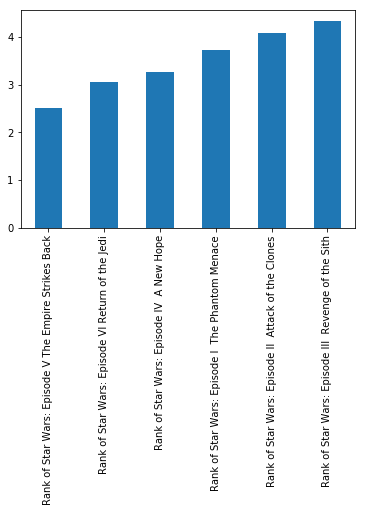

In [6]:
# Calculating the averages of each ranking and plot them in a bar chart
average_rankings = star_wars[star_wars.columns[9:15]].mean()
average_rankings.sort_values().plot.bar()

The results support the idea that Empire Strikes Back is the most revered film of the series.  While the specific order of these rankings is up for debate, the clustering of films in the top and bottom halves of the list is easy to explain:  The original trilogy is superior to the prequel trilogy.  

Something to note is that the survey asks participants whether or not they have seen each of the six films. It would be interesting to see which films have been viewed more often.

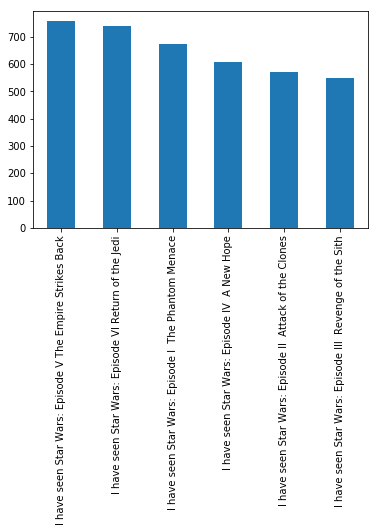

In [7]:
# Calculating the total number of views for each movie and plot them in a bar chart
total_viewings = star_wars[star_wars.columns[3:9]].sum()
total_viewings.sort_values(ascending=False).plot.bar()

The order of movie views from most to least is nearly identical to the movie rankings from best to worst.  However, for an accurate assessment of rankings, it doesn't make much sense to use viewings as a metric.  This will be addressed later on in this analysis, but for the next breakdown, fandom will be taken into consideration.

![Star Wars Star Trek](http://www.tshirtvortex.net/wp-content/uploads/moviewatchers-480x360.jpg)

### Fandom

For this next part, we will only look at participants who consider themselves fans of strictly either Star Wars or Star Trek.

In [9]:
# Creating dataframe for respondents that are exclusively fans of Star Wars or Star Trek
strict_sw_fans = star_wars[(star_wars["Do you consider yourself to be a fan of the Star Wars film franchise?"] == True) & (star_wars["Do you consider yourself to be a fan of the Star Trek franchise?"] == "No")]
strict_st_fans = star_wars[(star_wars["Do you consider yourself to be a fan of the Star Wars film franchise?"] == False) & (star_wars["Do you consider yourself to be a fan of the Star Trek franchise?"] == "Yes")]
print(" Number of Star Wars fans: " + str(len(strict_sw_fans)) + 
      "\n Number of Star Trek fans: " +  str(len(strict_st_fans)) + 
      "\n Number of respondents: " + str(len (star_wars)))

 Number of Star Wars fans: 175
 Number of Star Trek fans: 45
 Number of respondents: 1186


First, the summary for Star Wars fans.

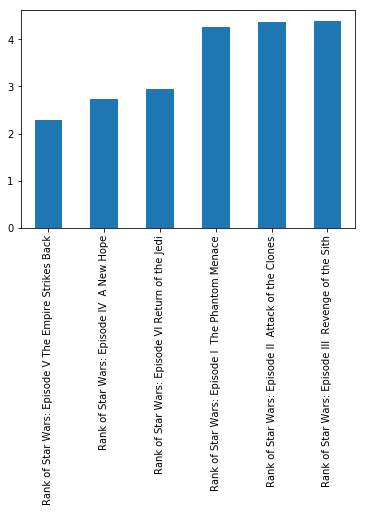

In [13]:
# Calculating the averages of each ranking for exclusive fans of 
# Star Wars and plot them in a bar chart
sw_average_rankings = strict_sw_fans[strict_sw_fans.columns[9:15]].mean()
sw_average_rankings.sort_values().plot.bar()

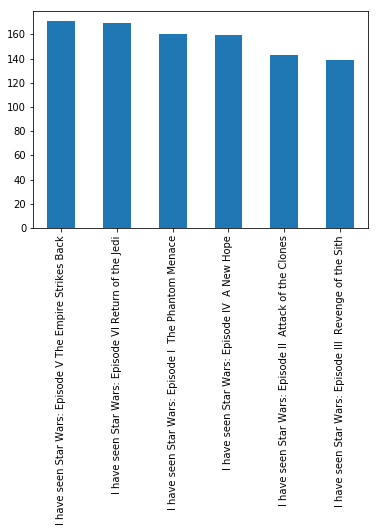

In [11]:
# Calculating the total number of views for each movie for exclusive
# Star Wars fans and plot them in a bar chart
sw_total_viewings = strict_sw_fans[strict_sw_fans.columns[3:9]].sum()
sw_total_viewings.sort_values(ascending=False).plot.bar()

The bar charts for ranking and number of viewings among respondents that are exclusively fans of Star Wars are almost exactly the same in order of best to worst and most to least, respectively.  The only difference is that A New Hope is ranked higher than Return of the Jedi.  Two things to note are 

1. The difference in rankings between the original trilogy and prequel trilogy is greater than that of the general population, which makes sense as Star Wars fans are more critical of the flaws found in the prequels.

2. The difference between the number of viewings of each movie is less than that of the general population.  This also makes sense because Star Wars fans are more likely to have seen all of the movies, rather than a subset.  


Next, Star Trek fans.

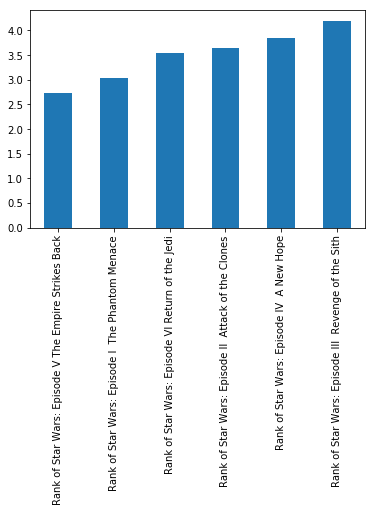

In [14]:
# Calculating the averages of each ranking for exclusive fans of 
# Star Trek and plot them in a bar chart
st_average_rankings = strict_st_fans[strict_st_fans.columns[9:15]].mean()
st_average_rankings.sort_values().plot.bar()

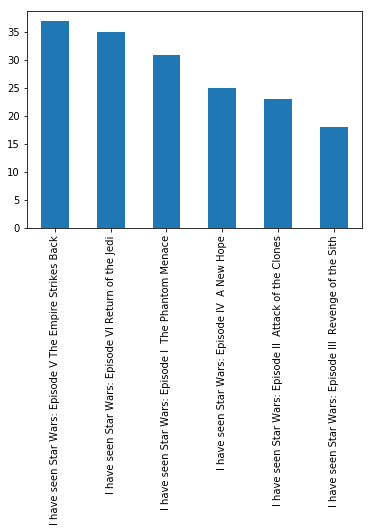

In [15]:
# Calculating the total number of views for each movie for exclusive
# Star Trek fans and plot them in a bar chart
st_total_viewings = strict_st_fans[strict_st_fans.columns[3:9]].sum()
st_total_viewings.sort_values(ascending=False).plot.bar()

Among exclusively Star Trek fans, Empire still sits atop the rankings and viewings, but the most striking result is how well The Phantom Menace is regarded, and how conversely A New Hope is less appreciated.  I have no solid theories as to why this is, but I feel that it comes from contempt or indifference for the series.

### Proper viewing

As stated in , it would be more meaningful to analyze the rankings of each movie by respondents who have seen all 6 films.  As a statistical exercise, below are the results of a chi square test between the expected values (i.e. everyone has seen all six films) and the observed values.


In [8]:
has_seen = []
has_not = []

for r in range(3,9):
    has_not.append(star_wars.iloc[:,r].value_counts()[0])
    has_seen.append(star_wars.iloc[:,r].value_counts()[1])

obs = [has_seen,has_not]
# Using most viewed movie of the six, i.e. Episode V, as the expected
exp = [[758,758,758,758,758,758],[428,428,428,428,428,428]] 

from scipy.stats import chisquare
chi = pd.DataFrame(chisquare(obs, f_exp = exp), columns=star_wars.columns[3:9], index=['Chi Square','P-Value'])
chi 

,I have seen Star Wars: Episode I The Phantom Menace,I have seen Star Wars: Episode II Attack of the Clones,I have seen Star Wars: Episode III Revenge of the Sith,I have seen Star Wars: Episode IV A New Hope,I have seen Star Wars: Episode V The Empire Strikes Back,I have seen Star Wars: Episode VI Return of the Jedi
Chi Square,2.641250e+01,1.278365e+02,1.581606e+02,8.335384e+01,0.0,1.462284
P-Value,2.757497e-07,1.218800e-29,2.854584e-36,6.860543e-20,1.0,0.226567


While the results show there is a significant difference in viewings for most movies, it's just a formality.  It could merely be argued that in order to thoroughly rank the Star Wars saga, all of the films must have been viewed.  A new dataset will be created that only has participants that meet this criterion.  

In [30]:
# Removing all respondents who have not seen all six movies

saw1 = star_wars.iloc[:,3] == True
saw2 = star_wars.iloc[:,4] == True
saw3 = star_wars.iloc[:,5] == True
saw4 = star_wars.iloc[:,6] == True
saw5 = star_wars.iloc[:,7] == True
saw6 = star_wars.iloc[:,8] == True

all_viewed = star_wars[saw1 & saw2 & saw3 & saw4 & saw5 & saw6]
print(len(all_viewed))

471


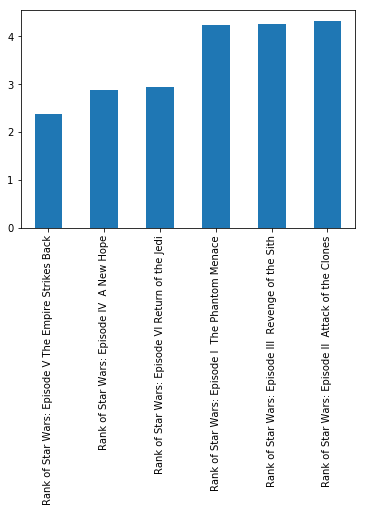

In [51]:
# Calculating the averages of each ranking for respondents who saw all six 
# Star Wars films and plot them in a bar chart
all_average_rankings = all_viewed[all_viewed.columns[9:15]].mean()
all_average_rankings.sort_values().plot.bar()

The chart is similar to the one for respondents who are exclusively fans of Star Wars, except that Revenge of the Sith is ranked higher than Attack of the Clones.

### Other demographics

Future considerations:

- Segmenting the data based on columns like Education, Location (Census Region), and Which character shot first?, and creating the same summary visualizations
- Use the character opinions to determing:
        - Which character do respondents like the most?
        - Which character do respondents dislike the most?
        - Which character is the most controversial (split between likes and dislikes)?
